In [1]:
import pandas as pd
import numpy as np
np.randomseed

In [5]:
sales = range(1, 31) + (.5 - np.random.rand(30)) #generates half negative decimals and half positive decimals

df = (pd.DataFrame({'sales': sales})
      .set_index(pd.date_range('2019-01-01', '2019-01-30', freq = 'D')) #to generate a time series
      .sample(20) #picks 20 
      .sort_index()
     )
df['sales'] = df['sales'].apply(lambda x: round(x, 2))
df

,sales
2019-01-01,1.19
2019-01-03,2.52
2019-01-05,4.61
2019-01-06,6.46
2019-01-08,8.36
2019-01-09,8.89
2019-01-11,11.24
2019-01-15,15.32
2019-01-17,17.42
2019-01-18,18.37


In [6]:
df = df.resample('D').asfreq()  #fill in missing dates by day as index, only work with a datetime series index ffil() will get the value forward and add it to the cell
df

,sales
2019-01-01,1.19
2019-01-02,NaN
2019-01-03,2.52
2019-01-04,NaN
2019-01-05,4.61
2019-01-06,6.46
2019-01-07,NaN
2019-01-08,8.36
2019-01-09,8.89
2019-01-10,NaN


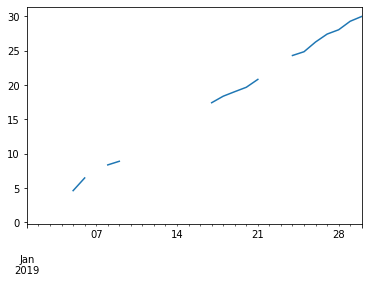

In [8]:
df['sales'].plot()

In [9]:
#LINEAR INTERPOLATION

#TIME SERIES, NO MISSING DATA

#INTERPOLATE works with small amount of missing data.

df2 = df.interpolate() #will generate missing data by guessing the formula to fill it
df2

,sales
2019-01-01,1.190
2019-01-02,1.855
2019-01-03,2.520
2019-01-04,3.565
2019-01-05,4.610
2019-01-06,6.460
2019-01-07,7.410
2019-01-08,8.360
2019-01-09,8.890
2019-01-10,10.065


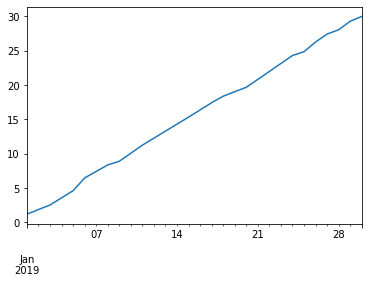

In [10]:
df2['sales'].plot()

# datetime.toordinal()

In [16]:
#Returns the day count from the date 01/01/1901

In [12]:
df2.reset_index(inplace = True)
df2.head()

,index,sales
0,2019-01-01,1.190
1,2019-01-02,1.855
2,2019-01-03,2.520
3,2019-01-04,3.565
4,2019-01-05,4.610


In [15]:
df2['day'] = df2['index'].apply(lambda x: x.toordinal())
             

df2.head()

,index,sales,day
0,2019-01-01,1.190,737060
1,2019-01-02,1.855,737061
2,2019-01-03,2.520,737062
3,2019-01-04,3.565,737063
4,2019-01-05,4.610,737064


In [17]:
features = df2[['day']] #you can have multiple features
features.head()

,day
0,737060
1,737061
2,737062
3,737063
4,737064


In [19]:
target = df2[['sales']]
target.head()

,sales
0,1.190
1,1.855
2,2.520
3,3.565
4,4.610


In [20]:
from sklearn.model_selection import train_test_split #returns 4 args, takes a min of 2 args


X_train, X_test, y_train, y_test = train_test_split(
    features, #important features for prediction
    target, #what you want to predict
    test_size = .2,
    random_state = 42, #keeps the same values every time you select randomly
)

X_train

,day
28,737088
24,737084
12,737072
0,737060
4,737064
16,737076
5,737065
13,737073
11,737071
22,737082


In [21]:
len(X_train)

24

In [22]:
X_test

,day
27,737087
15,737075
23,737083
17,737077
8,737068
9,737069


In [23]:
# Do we want random selections for time series data? Order MATTERS! 

In [26]:
i = round(df.shape[0] * .8) #Use 80% of data for training
features[:i]

,day
0,737060
1,737061
2,737062
3,737063
4,737064
5,737065
6,737066
7,737067
8,737068
9,737069


In [28]:
target[:i]

,sales
0,1.190
1,1.855
2,2.520
3,3.565
4,4.610
5,6.460
6,7.410
7,8.360
8,8.890
9,10.065


# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(
    features[:i],
    target[:i] #always pass a non multidimmensional array, that is why you have to use ravel()
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# np.array.ravel()

In [32]:
target[:i].values

array([[ 1.19 ],
       [ 1.855],
       [ 2.52 ],
       [ 3.565],
       [ 4.61 ],
       [ 6.46 ],
       [ 7.41 ],
       [ 8.36 ],
       [ 8.89 ],
       [10.065],
       [11.24 ],
       [12.26 ],
       [13.28 ],
       [14.3  ],
       [15.32 ],
       [16.37 ],
       [17.42 ],
       [18.37 ],
       [19.03 ],
       [19.67 ],
       [20.82 ],
       [21.98 ],
       [23.14 ],
       [24.3  ]])

In [33]:
target[:i].values.ravel()

array([ 1.19 ,  1.855,  2.52 ,  3.565,  4.61 ,  6.46 ,  7.41 ,  8.36 ,
        8.89 , 10.065, 11.24 , 12.26 , 13.28 , 14.3  , 15.32 , 16.37 ,
       17.42 , 18.37 , 19.03 , 19.67 , 20.82 , 21.98 , 23.14 , 24.3  ])

In [34]:
np.ravel(target[:i].values)

array([ 1.19 ,  1.855,  2.52 ,  3.565,  4.61 ,  6.46 ,  7.41 ,  8.36 ,
        8.89 , 10.065, 11.24 , 12.26 , 13.28 , 14.3  , 15.32 , 16.37 ,
       17.42 , 18.37 , 19.03 , 19.67 , 20.82 , 21.98 , 23.14 , 24.3  ])

In [35]:
features[i:] #test features

,day
24,737084
25,737085
26,737086
27,737087
28,737088
29,737089


In [36]:
#PREDICITONS
predictions = model.predict(features[i:]) #how do we know if they are good
predictions

array([[25.21971014],
       [26.22920362],
       [27.2386971 ],
       [28.24819058],
       [29.25768406],
       [30.26717754]])

# LinearRegression().score()

- "Returns the coefficient of determination R^2 of the prediction"
- "The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()"
- R^2 is the percentage of the dependent variable's variation that a linear model explains
- Always between 0 and 100% (higher is better)

In [38]:
model.score(
    features[i:], # Uses these values to predict outcomes
    target[i:] #Compares predictions to actual outcomes
)

0.9840875002871367

In [39]:
#USING R2_SCORE

from sklearn.metrics import r2_score

coefficient_of_determination = r2_score(
    target[i:].values.ravel(), #ravel has to be used
    predictions
)

coefficient_of_determination

0.9840875002871367

In [40]:
score = pd.DataFrame({
    'date': features[i:].values.ravel(),
    'actual': target[i:].values.ravel(),
    'predicted': predictions.ravel()
})
score

,date,actual,predicted
0,737084,24.85,25.219710
1,737085,26.27,26.229204
2,737086,27.42,27.238697
3,737087,28.05,28.248191
4,737088,29.29,29.257684
5,737089,29.99,30.267178


In [41]:
# u is the residual sum of squares ((y_true - y_pred) ** 2).sum()

score['residual'] = (score['actual'] - score['predicted']) ** 2
score

,date,actual,predicted,residual
0,737084,24.85,25.219710,0.136686
1,737085,26.27,26.229204,0.001664
2,737086,27.42,27.238697,0.032871
3,737087,28.05,28.248191,0.039280
4,737088,29.29,29.257684,0.001044
5,737089,29.99,30.267178,0.076827


In [42]:
# v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

score['sq_diff_mean'] = (score['actual'] - score['actual'].mean()) ** 2
score

,date,actual,predicted,residual,sq_diff_mean
0,737084,24.85,25.219710,0.136686,7.812025
1,737085,26.27,26.229204,0.001664,1.890625
2,737086,27.42,27.238697,0.032871,0.050625
3,737087,28.05,28.248191,0.039280,0.164025
4,737088,29.29,29.257684,0.001044,2.706025
5,737089,29.99,30.267178,0.076827,5.499025


In [43]:
# R ** 2 = (1 - U/V)

In [44]:
u = score['residual'].sum()
v = score['sq_diff_mean'].sum()
r2 = 1 - (u/v)
r2

0.9840875002871367